# 

# Análisis Exploratorio de los Datos de Pymes Superintendencia

## Kelly Johana Beltrán - Henry D. Saenz Valverde

## Objetivo del proyecto y contextualización

Se desarrollará una investigación que permita identificar, a través de un modelo estadístico o de Machine Learning, los factores macroeconómicos y microecónomicos que favorecieron al crecimiento y la liquidez de ciertas empresas catalogadas como medinas y pequeñas o de categoría PYMES en Colombia durante el período 2017 - 2023.

## Librerías y Conjunto de datos

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import scipy.stats as stats

## 

In [2]:
documento = 'DataIndices.xlsx'  
data = pd.read_excel(documento)

Las variables que vamos a trabajar son:

 
 **NIT** : Número de Identificación Tributaria de la empresa.                             
 **Fecha de Corte** : Fecha en la que se realiza el análisis o el reporte.                           
 **Razón social de la sociedad** :Nombre oficial de la empresa.                                                                 
 **Clasificación Industrial Internacional Uniforme (CIIU)** :Código de actividad económica según la CIIU.                              
 **Tipo societario** :Forma legal de constitución de la empresa (e.g. S.A., SAS).                      
 **Dirección de notificación judicial registrada** :Dirección de contacto legal registrada en la Cámara de Comercio.                 
 **Departamento de la dirección del domicilio** :Departamento (región) de Colombia donde está ubicada la empresa.               
 **Ciudad de la dirección del domicilio** :Ciudad donde está ubicada la empresa.                                          
 **IPC (Índice de Precios al Consumidor)** :Índice que mide la evolución de los precios al consumidor en el país.           
 **PIB (Producto Interno Bruto)** :Valor total de los bienes y servicios producidos en el país.                    
 **DESEMPLEO** :Tasa de desempleo en el país.                                                  
 **Flujo de Caja Operativo** :Flujo de caja generado por las actividades operativas de la empresa.          
 **CAPEX**:Gastos de capital en activos fijos (Capital Expenditures).                     
 **Flujo de Caja Libre (FLC)** :Efectivo disponible después de cubrir gastos operativos y CAPEX.              
 **Razón Corriente** :Relación entre los activos y pasivos corrientes de la empresa (medida de liquidez).
 **Rotación Inventario Producto Terminado (días)** :Tiempo promedio que un producto terminado permanece en inventario.       
 **Rotación Cartera Días** : Número de días que en promedio tarda la empresa en cobrar sus cuentas.        
 **KTNO (Capital de Trabajo Neto Operativo)** :Capital de trabajo neto disponible para las operaciones de la empresa.        
 **ROA (Return on Assets)** :Rendimiento sobre los activos de la empresa, mide la eficiencia del uso de activos. 
 **MargenAntesImpuestos**: Margen de beneficio antes de impuestos.                                        
 **EBIT (Earnings Before Interest and Taxes)**: Beneficios antes de intereses e impuestos.                                    
 **MargenEBIT**: Margen de EBIT, relación entre EBIT y los ingresos totales.                     
 **UtilidadBruta** : Diferencia entre ingresos netos y el costo de los bienes vendidos (sin impuestos).
 **MargenBruto** : Relación entre la utilidad bruta y los ingresos netos.                                                                                             **RotacionActivoTotal**: Mide la eficiencia con la que una empresa usa sus activos para generar ingresos.
**ROE (Return on Equity)**: Rendimiento sobre el capital propio de la empresa.                             
 **RAAI** : Resultado Antes de Ajustes e Impuestos.                                       
 **RAP**: Resultado Después de Ajustes e Impuestos.                                       
 **NivelEndeudamiento**: Relación entre el total de pasivos y el total de activos de la empresa.       
 **CoberturaIntereses**: Capacidad de la empresa para cubrir los pagos de intereses con su EBIT.      
 **ServicioDeuda**: Pagos asociados al servicio de la deuda (capital e intereses).                 
 **FLC**: Flujo de Caja Libre, efectivo disponible después de CAPEX y gastos operativos.  
 **CoberturaServicioDeuda**: Capacidad para cubrir el servicio de la deuda con el flujo de caja operativo.   
 **FDC (Flujo de Caja de Dividendos)**: Flujo de caja destinado a los dividendos de los accionistas.                   
 **CoberturaDividendos**: Capacidad para cubrir los dividendos con el flujo de caja libre.            


# Data overview

El conjunto de datos posee 35 variables de interés de un total de 58380 observaciones correspondientes a cerca de 8.000 PYMES desde 2017 hasta 2023.

In [ ]:
data.shape

(58380, 35)

In [ ]:
data.head(100)

,NIT,Fecha de Corte,Razón social de la sociedad,Clasificación Industrial Internacional Uniforme Versión 4 A.C (CIIU),Tipo societario,Dirección de notificación judicial registrada en Cámara de Comercio,Departamento de la dirección del domicilio,Ciudad de la dirección del domicilio,IPC,PIB,...,ROE,RAAI,RAP,NivelEndeudamiento,CoberturaIntereses,ServicioDeuda,FLC,CoberturaServicioDeuda,FDC,CoberturaDividendos
0,800000268,2017-12-31,INVERSIONES SCHLEGEL DONADO S.A.S.,L6810 - Actividades inmobiliarias realizadas c...,08. SOCIEDAD POR ACCIONES SIMPLIFICADA SAS,CARRERA 53 82 115,ATLANTICO,BARRANQUILLA-ATLANTICO,7.69,209755.00,...,0.0,0.0,3.939199,74.614131,0.0,0,956092.0,0.0,0,0.0
1,800000268,2018-12-31,INVERSIONES SCHLEGEL DONADO S.A.S.,L6810 - Actividades inmobiliarias realizadas c...,08. SOCIEDAD POR ACCIONES SIMPLIFICADA SAS,CARRERA 53 82 115,ATLANTICO,BARRANQUILLA-ATLANTICO,-1.16,225397.00,...,0.0,0.0,5.193762,80.746133,0.0,0,972379.0,0.0,0,0.0
2,800000268,2019-12-31,INVERSIONES SCHLEGEL DONADO S.A.S.,L6810 - Actividades inmobiliarias realizadas c...,08. SOCIEDAD POR ACCIONES SIMPLIFICADA SAS,CARRERA 53 82 115,ATLANTICO,BARRANQUILLA-ATLANTICO,2.82,241211.00,...,0.0,0.0,4.811973,79.218505,0.0,0,1041906.0,0.0,0,0.0
3,800000268,2020-12-31,INVERSIONES SCHLEGEL DONADO S.A.S.,L6810 - Actividades inmobiliarias realizadas c...,08. SOCIEDAD POR ACCIONES SIMPLIFICADA SAS,CARRERA 53 82 115,ATLANTICO,BARRANQUILLA-ATLANTICO,4.96,242115.00,...,0.0,0.0,4.781703,79.086947,0.0,0,1044607.0,0.0,0,0.0
4,800000268,2021-12-31,INVERSIONES SCHLEGEL DONADO S.A.S.,L6810 - Actividades inmobiliarias realizadas c...,08. SOCIEDAD POR ACCIONES SIMPLIFICADA SAS,CARRERA 53 82 115,ATLANTICO,BARRANQUILLA-ATLANTICO,3.98,263015.00,...,0.0,0.0,2.374080,57.878423,0.0,0,3028153.0,0.0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,800003215,2021-12-31,VJ CARDIOSISTEMAS SAS,G4645 - Comercio al por mayor de productos far...,08. SOCIEDAD POR ACCIONES SIMPLIFICADA SAS,CALLE 106 A 45 A 35,BOGOTA D.C.,BOGOTA D.C.,3.68,216636.00,...,0.0,0.0,1.711328,41.565853,0.0,0,10382927.0,0.0,0,0.0
96,800003215,2022-12-31,VJ CARDIOSISTEMAS SAS,G4645 - Comercio al por mayor de productos far...,08. SOCIEDAD POR ACCIONES SIMPLIFICADA SAS,CALLE 106 A 45 A 35,BOGOTA D.C.,BOGOTA D.C.,6.94,61953.13,...,0.0,0.0,1.698593,41.127753,0.0,0,11450121.0,0.0,0,0.0
97,800003215,2023-12-31,VJ CARDIOSISTEMAS SAS,G4645 - Comercio al por mayor de productos far...,08. SOCIEDAD POR ACCIONES SIMPLIFICADA SAS,CALLE 106 A 45 A 35,BOGOTA D.C.,BOGOTA D.C.,9.26,295710.60,...,0.0,0.0,1.619339,38.246424,0.0,0,13835431.0,0.0,0,0.0
98,800003367,2017-12-31,SUMINISTROS INDUSTRIALESY ASESORIAS S.A.S.,G4774 - Comercio al por menor de otros product...,08. SOCIEDAD POR ACCIONES SIMPLIFICADA SAS,VIA 40 # 84 -87,ATLANTICO,BARRANQUILLA-ATLANTICO,6.34,163052.00,...,0.0,0.0,2.596917,61.492808,0.0,0,4164941.0,0.0,0,0.0


In [ ]:
data.columns

Index(['NIT', 'Fecha de Corte', 'Razón social de la sociedad',
       'Clasificación Industrial Internacional Uniforme Versión 4 A.C (CIIU)',
       'Tipo societario',
       'Dirección de notificación judicial registrada en Cámara de Comercio',
       'Departamento de la dirección del domicilio',
       'Ciudad de la dirección del domicilio', 'IPC', 'PIB', 'DESEMPLEO',
       'Flujo de Caja Operativo', 'CAPEX', 'Flujo de Caja Libre (FLC)',
       'Razón Corriente', 'Rotación Inventario Producto Terminado (días)',
       'Rotacion Cartera Dias', 'KTNO', 'ROA', 'MargenAntesImpuestos', 'EBIT',
       'MargenEBIT', 'UtilidadBruta', 'MargenBruto', 'RotacionActivoTotal',
       'ROE', 'RAAI', 'RAP', 'NivelEndeudamiento', 'CoberturaIntereses',
       'ServicioDeuda', 'FLC', 'CoberturaServicioDeuda', 'FDC',
       'CoberturaDividendos'],
      dtype='object')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58380 entries, 0 to 58379
Data columns (total 35 columns):
 #   Column                                                                Non-Null Count  Dtype  
---  ------                                                                --------------  -----  
 0   NIT                                                                   58380 non-null  int64  
 1   Fecha de Corte                                                        58380 non-null  object 
 2   Razón social de la sociedad                                           58378 non-null  object 
 3   Clasificación Industrial Internacional Uniforme Versión 4 A.C (CIIU)  58380 non-null  object 
 4   Tipo societario                                                       58380 non-null  object 
 5   Dirección de notificación judicial registrada en Cámara de Comercio   58380 non-null  object 
 6   Departamento de la dirección del domicilio                            58380 non-null  object 


Adicionamos una columna para identificar el año de análisis en lugar de identificar la fecha por año de corte

In [3]:
data['Fecha de Corte'] = pd.to_datetime(data['Fecha de Corte'], errors = 'coerce')
data['Año'] = data['Fecha de Corte'].dt.year
print(data[['Fecha de Corte', 'Año']].head())

  Fecha de Corte   Año
0     2017-12-31  2017
1     2018-12-31  2018
2     2019-12-31  2019
3     2020-12-31  2020
4     2021-12-31  2021


## Análisis de datos faltantes

In [9]:
datos_faltantes = data.isnull().sum()
datos_faltantes

NIT                                                                        0
Fecha de Corte                                                             0
Razón social de la sociedad                                                2
Clasificación Industrial Internacional Uniforme Versión 4 A.C (CIIU)       0
Tipo societario                                                            0
Dirección de notificación judicial registrada en Cámara de Comercio        0
Departamento de la dirección del domicilio                                 0
Ciudad de la dirección del domicilio                                       0
IPC                                                                        0
PIB                                                                        0
DESEMPLEO                                                                  0
Flujo de Caja Operativo                                                    0
CAPEX                                                                      0

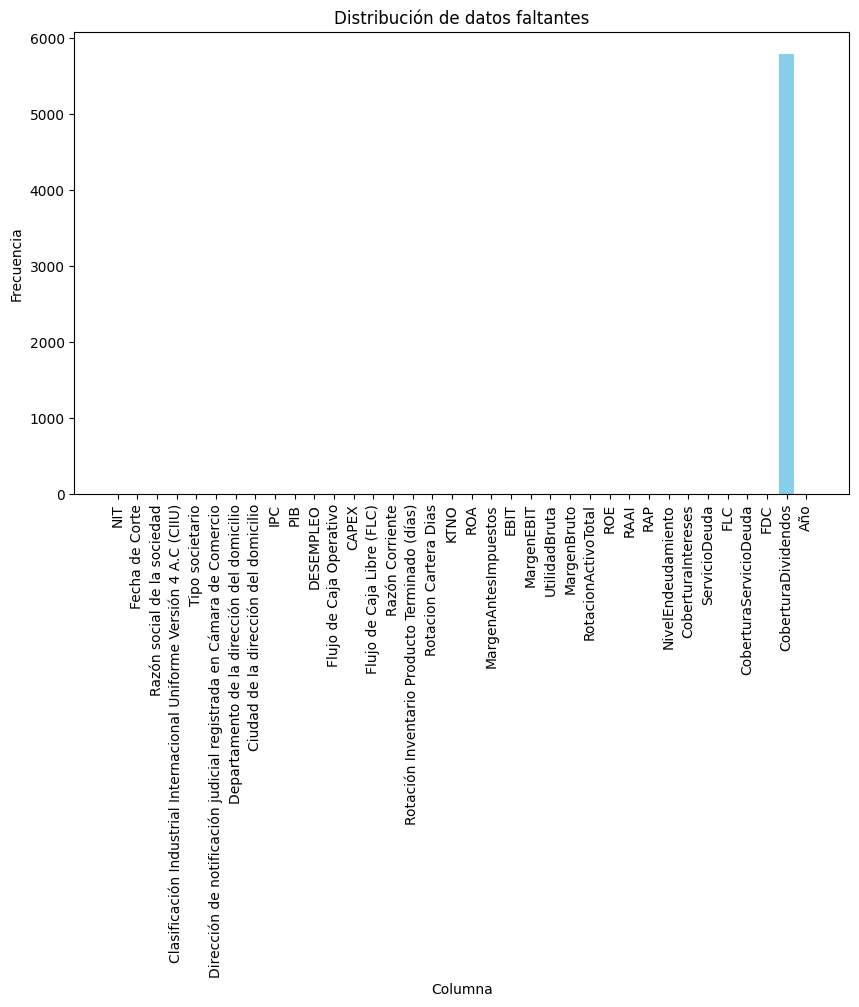

In [10]:
faltantes = pd.DataFrame({'Columna': data.columns, 'Datos faltantes': datos_faltantes})
plt.figure(figsize=(10, 6))
plt.bar(faltantes['Columna'], faltantes['Datos faltantes'], color = 'skyblue')
plt.title('Distribución de datos faltantes')
plt.xlabel('Columna')
plt.ylabel('Frecuencia')
plt.xticks(rotation=90)
plt.show()

### Inspeccionamos nuestra variable Cobertura de Dividendos

Datos faltantes por año

Inspeccionamos los datos faltantes por año para la variable Cobertura de dividendos

In [4]:
faltantes_por_años = data.groupby('Año').apply(lambda x: x.isnull().sum())
print(faltantes_por_años[['CoberturaDividendos']])

      CoberturaDividendos
Año                      
2017                  823
2018                  829
2019                  826
2020                  827
2021                  833
2022                  822
2023                  830


C:\Users\KELLY\AppData\Local\Temp\ipykernel_22248\206079219.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  faltantes_por_años = data.groupby('Año').apply(lambda x: x.isnull().sum())


In [5]:
faltantes_por_año = data.groupby('Año')['CoberturaDividendos'].apply(lambda x: x.isnull().sum()).reset_index()

# Cambiar el nombre de la columna para reflejar los datos faltantes
faltantes_por_año.columns = ['Año', 'Datos_Faltantes']

# Graficar los datos faltantes por año para la columna 'CoberturaDividendos'
fig = px.bar(
    faltantes_por_año,  # DataFrame con el conteo de faltantes
    x='Año',  # Columna de años
    y='Datos_Faltantes',  # Columna con el conteo de datos faltantes
    title='Distribución de datos faltantes por año',
    labels={'Datos_Faltantes': 'Frecuencia', 'Año': 'Año'},  # Etiquetas de los ejes
    hover_data={'Año': True, 'Datos_Faltantes': True},  # Mostrar los datos al pasar el cursor
    text='Datos_Faltantes'  # Mostrar el valor directamente en las barras
)

# Ajustar el diseño para que sea más limpio
fig.update_layout(
    xaxis_title='Año',
    yaxis_title='Cantidad de Cbertura de Dividendos Faltantes',
    width=700, 
    height=600,
    bargap=0.1  # Añadir espacio entre las barras
)

# Mostrar el gráfico
fig.show()

Datos Faltantes por sector

Inspeccionamos los datos faltantes por sector para la variable Cobertura de Dividendos con el objetivo de intuir cuales son los sectores que más falta de reporte en cobertura de dividendos presentan de manera reiterativa o si son las mismas empresas en los mismos sectores. En el análisis se descubre el siguiente top 10 de los sectores con más datos faltantes o reporte para la cobertura de dividendos:

- Actividades inmobiliarias

- Construcción de edificios

- Actividades de servicio financiero excepto seguros

- Actividades de administración empresarial

- Construcción de otras obras del sector civil

In [6]:
faltantes_por_sector = data.groupby('Clasificación Industrial Internacional Uniforme Versión 4 A.C (CIIU)').apply(lambda x: x.isnull().sum())
print(faltantes_por_sector[['CoberturaDividendos']])

                                                    CoberturaDividendos
Clasificación Industrial Internacional Uniforme...                     
A0111 - Cultivo de cereales (excepto arroz), le...                    7
A0112 - Cultivo de arroz                                              1
A0113 - Cultivo de hortalizas, raíces y tubérculos                    0
A0114 - Cultivo de tabaco                                             1
A0115 - Cultivo de plantas textiles                                   0
...                                                                 ...
S9529 - Mantenimiento y reparación de otros efe...                    0
S9601 - Lavado y limpieza, incluso la limpieza ...                    0
S9602 - Peluquería y otros tratamientos de belleza                    0
S9603 - Pompas fúnebres y actividades relacionadas                    7
S9609 - Otras actividades de servicios personal...                   12

[443 rows x 1 columns]


C:\Users\KELLY\AppData\Local\Temp\ipykernel_22248\3063682511.py:1: DeprecationWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.



In [7]:
faltantes_por_sector = data.groupby('Clasificación Industrial Internacional Uniforme Versión 4 A.C (CIIU)')['CoberturaDividendos'].apply(lambda x: x.isnull().sum()).reset_index()

# Cambiar el nombre de la columna para reflejar los datos faltantes
faltantes_por_sector.columns = ['CIIU', 'Datos Faltantes para Cobertura de Dividendos']

# Ordenar por la cantidad de datos faltantes y seleccionar el Top 10
top_10_faltantes = faltantes_por_sector.sort_values(by='Datos Faltantes para Cobertura de Dividendos', ascending=False).head(10)

# Graficar los datos faltantes por sector (Top 10)
fig = px.bar(
    top_10_faltantes,  # DataFrame con el top 10 de faltantes
    x='CIIU',  # Columna de sectores
    y='Datos Faltantes para Cobertura de Dividendos',  # Columna con el conteo de datos faltantes
    title='Top 10 Sectores con Mayor Cantidad de Datos Faltantes en Cobertura de Dividendos',
    labels={'Datos Faltantes para Cobertura de Dividendos': 'Frecuencia', 'CIIU': 'Sector (CIIU)'},  # Etiquetas de los ejes
    hover_data={'CIIU': True, 'Datos Faltantes para Cobertura de Dividendos': True},  # Mostrar los datos al pasar el cursor
    text='Datos Faltantes para Cobertura de Dividendos'  # Mostrar el valor directamente en las barras
)

# Ajustar el diseño para que sea más limpio
fig.update_layout(
    xaxis_title='Sector (CIIU)',
    yaxis_title='Cantidad de Cobertura de Dividendos Faltantes',
    width=800, 
    height=500,
    bargap=0.1  # Añadir espacio entre las barras
)

# Mostrar el gráfico
fig.show()

¿Se repiten los mismos sectores con falta de cobertura de dividendos a lo largo de los años? o ¿Hay alguna variación en el reporte de datos faltantes por sector (CIIU) a lo largo de los años?

Con base a una inspección gráfica se puede determinar que a través de los años se mantienen los mismos sectores empresariales registrados en el CIIU con mayor número de datos faltantes para la cobertura de dividendos. Lo que podría significar o falta de capital para la repartición de los mismos u otro tipo de factores los cuales se analizarán más adelante.

Con respecto a cualquier proceso de imputación de datos para la variable no se considera pertinente hacerlo ya que es un índice extraído de factores financierops y reportes internos de las empresas. Por tanto se podría evaluar alternativas de calculos indirectos.

In [8]:
# Agrupar por sector (CIIU) y año para contar los datos faltantes en CoberturaDividendos
faltantes_por_sector_año = data.groupby(['Clasificación Industrial Internacional Uniforme Versión 4 A.C (CIIU)', 'Año'])['CoberturaDividendos'].apply(lambda x: x.isnull().sum()).reset_index()

# Cambiar el nombre de las columnas para reflejar los datos faltantes
faltantes_por_sector_año.columns = ['CIIU', 'Año', 'Datos Faltantes para Cobertura de Dividendos']

# Ordenar por la cantidad de datos faltantes
top_10_faltantes_por_sector = faltantes_por_sector_año.groupby('CIIU')['Datos Faltantes para Cobertura de Dividendos'].sum().reset_index().sort_values(by='Datos Faltantes para Cobertura de Dividendos', ascending=False).head(10)

# Filtrar los datos originales para obtener solo los sectores del Top 10
top_10_sectores_faltantes = faltantes_por_sector_año[faltantes_por_sector_año['CIIU'].isin(top_10_faltantes_por_sector['CIIU'])]

# Graficar los datos faltantes por sector (Top 10) y año
fig = px.bar(
    top_10_sectores_faltantes,  # DataFrame con el top 10 de faltantes por sector y año
    x='Año',  # Columna de años
    y='Datos Faltantes para Cobertura de Dividendos',  # Columna con el conteo de datos faltantes
    color='CIIU',  # Colorear por sector (CIIU)
    title='Top 10 Sectores con Mayor Cantidad de Datos Faltantes en Cobertura de Dividendos a lo Largo de los Años',
    labels={'Datos Faltantes para Cobertura de Dividendos': 'Frecuencia', 'Año': 'Año', 'CIIU': 'Sector (CIIU)'},  # Etiquetas de los ejes
    hover_data={'CIIU': True, 'Datos Faltantes para Cobertura de Dividendos': True, 'Año': True},  # Mostrar los datos al pasar el cursor
    text='Datos Faltantes para Cobertura de Dividendos',  # Mostrar el valor directamente en las barras
    barmode='group'  # Para agrupar las barras por año
)

# Ajustar el diseño para que sea más limpio
fig.update_layout(
    xaxis_title='Año',
    yaxis_title='Cantidad de Cobertura de Dividendos Faltantes',
    width=1200, 
    height=600,
    bargap=0.15  # Añadir espacio entre las barras
)

# Mostrar el gráfico
fig.show()

## Descripción de Variables

### Variables Categóricas

In [ ]:
data.select_dtypes(include=['object']).describe()

,Fecha de Corte,Razón social de la sociedad,Clasificación Industrial Internacional Uniforme Versión 4 A.C (CIIU),Tipo societario,Dirección de notificación judicial registrada en Cámara de Comercio,Departamento de la dirección del domicilio,Ciudad de la dirección del domicilio
count,58380,58378,58380,58380,58380,58380,58380
unique,19,18408,443,8,27651,30,274
top,2017-12-31,ENERGIZAR SAS,L6810 - Actividades inmobiliarias realizadas c...,08. SOCIEDAD POR ACCIONES SIMPLIFICADA SAS,CR 50 E 8 SUR 63,BOGOTA D.C.,BOGOTA D.C.
freq,8340,14,9735,37394,59,27248,15476


In [9]:
Frecuencia_RazonS = data['Razón social de la sociedad'].value_counts()
print(Frecuencia_RazonS)

Razón social de la sociedad
ENERGIZAR SAS                         14
CLUB UNION SA                         12
COMBUSTIBLES DEL CESAR Y CIA LTDA      9
KENZO JEANS SAS                        8
SERVICIOS DE INGENIERIA CIVIL S.A.     8
                                      ..
IINVERSIONES POU SAS                   1
BABAYARO S.A.S.                        1
BABAYARO S.A.S                         1
DISEÑOS Y CONSTRUCCIONES S.A.S         1
DISEÑOS Y CONSTRUCCIONES LTDA          1
Name: count, Length: 18408, dtype: int64


Seobserva que en Bogota, Antioquia, Valle, cundinamarca y Atlantico se encuentra el mayor número de Pymes a nivel nacional

In [10]:
Frecuencia_dep = data['Departamento de la dirección del domicilio'].value_counts()
print(Frecuencia_dep)

Departamento de la dirección del domicilio
BOGOTA D.C.                 27248
ANTIOQUIA                    9881
VALLE                        4879
CUNDINAMARCA                 3749
ATLANTICO                    2821
SANTANDER                    1808
BOLIVAR                      1226
RISARALDA                     917
CALDAS                        711
NORTE DE SANTANDER            587
META                          579
MAGDALENA                     531
TOLIMA                        506
BOYACA                        346
QUINDIO                       346
HUILA                         346
NARINO                        340
CORDOBA                       322
CAUCA                         280
CESAR                         211
SAN ANDRES Y PROVIDENCIA      203
CASANARE                      176
SUCRE                         153
CAQUETA                        88
LA GUAJIRA                     37
PUTUMAYO                       30
CHOCO                          21
ARAUCA                         19
AMAZO

In [11]:
coordenadas_departamentos = {
    'BOGOTA D.C.': {'lat': 4.60971, 'lon': -74.08175},
    'ANTIOQUIA': {'lat': 6.25184, 'lon': -75.56359},
    'VALLE': {'lat': 3.45164, 'lon': -76.53198},
    'CUNDINAMARCA': {'lat': 4.74086, 'lon': -74.29733},
    'ATLANTICO': {'lat': 10.96854, 'lon': -74.78132},
    'SANTANDER': {'lat': 7.12539, 'lon': -73.1198},
    'BOLIVAR': {'lat': 10.39972, 'lon': -75.51444},
    'RISARALDA': {'lat': 4.81333, 'lon': -75.69611},
    'CALDAS': {'lat': 5.07028, 'lon': -75.51361},
    'NORTE DE SANTANDER': {'lat': 7.94672, 'lon': -72.89829},
    'META': {'lat': 4.15333, 'lon': -73.63584},
    'MAGDALENA': {'lat': 10.24125, 'lon': -74.21102},
    'TOLIMA': {'lat': 4.43889, 'lon': -75.23222},
    'HUILA': {'lat': 2.9273, 'lon': -75.28189},
    'QUINDIO': {'lat': 4.48559, 'lon': -75.645},
    'BOYACA': {'lat': 5.45451, 'lon': -73.362},
    'NARINO': {'lat': 1.20892, 'lon': -77.27721},
    'CORDOBA': {'lat': 8.75, 'lon': -75.88},
    'CAUCA': {'lat': 2.44568, 'lon': -76.61474},
    'CESAR': {'lat': 10.46139, 'lon': -73.25322},
    'SAN ANDRES Y PROVIDENCIA': {'lat': 12.58472, 'lon': -81.70056},
    'CASANARE': {'lat': 5.33493, 'lon': -71.75608},
    'SUCRE': {'lat': 9.30472, 'lon': -75.39778},
    'CAQUETA': {'lat': 0.87075, 'lon': -73.8419},
    'LA GUAJIRA': {'lat': 11.54444, 'lon': -72.90722},
    'PUTUMAYO': {'lat': 0.57633, 'lon': -76.0647},
    'CHOCO': {'lat': 5.69472, 'lon': -76.66111},
    'ARAUCA': {'lat': 6.5555, 'lon': -71.33217},
    'AMAZONAS': {'lat': -1.4429, 'lon': -71.57239},
    'VICHADA': {'lat': 5.8, 'lon': -67.44}
}

# Convertir el diccionario de coordenadas a un DataFrame
df_coords = pd.DataFrame.from_dict(coordenadas_departamentos, orient='index')

# Frecuencia de empresas por departamento (datos del usuario)
frecuencia_empresas = {
    'BOGOTA D.C.': 27248, 'ANTIOQUIA': 9881, 'VALLE': 4879, 'CUNDINAMARCA': 3749, 'ATLANTICO': 2821, 
    'SANTANDER': 1808, 'BOLIVAR': 1226, 'RISARALDA': 917, 'CALDAS': 711, 'NORTE DE SANTANDER': 587, 
    'META': 579, 'MAGDALENA': 531, 'TOLIMA': 506, 'HUILA': 346, 'QUINDIO': 346, 'BOYACA': 346, 
    'NARINO': 340, 'CORDOBA': 322, 'CAUCA': 280, 'CESAR': 211, 'SAN ANDRES Y PROVIDENCIA': 203, 
    'CASANARE': 176, 'SUCRE': 153, 'CAQUETA': 88, 'LA GUAJIRA': 37, 'PUTUMAYO': 30, 'CHOCO': 21, 
    'ARAUCA': 19, 'AMAZONAS': 14, 'VICHADA': 5
}

# Convertir el diccionario de frecuencias a un DataFrame
df_frecuencia = pd.DataFrame(list(frecuencia_empresas.items()), columns=['Departamento', 'Frecuencia'])

# Unir ambos DataFrames (coordenadas y frecuencias)
df_final = df_frecuencia.join(df_coords, on='Departamento')

# Graficar un mapa de burbujas con las frecuencias de empresas por departamento
fig = px.scatter_geo(df_final, lat='lat', lon='lon', size='Frecuencia', hover_name='Departamento',
                     title='Frecuencia de Empresas por Departamento en Colombia',
                     size_max=50, scope='south america')

# Ajustar los límites del mapa a Colombia
fig.update_geos(
    visible=False, resolution=50,
    showcountries=True, countrycolor="Black",
    showsubunits=True, subunitcolor="Black"
)

# Mostrar el gráfico
fig.show()

In [12]:
Frecuencia_Ciudad = data['Ciudad de la dirección del domicilio'].value_counts()
print(Frecuencia_Ciudad)

Ciudad de la dirección del domicilio
BOGOTA D.C.                15476
BOGOTA-D.C.-BOGOTA D.C.    10116
MEDELLIN-ANTIOQUIA          6094
CALI-VALLE                  3446
BARRANQUILLA-ATLANTICO      2546
                           ...  
GUATICA-RISARALDA              1
SANTA-ANA-MAGDALENA            1
ZONA-BANANERA-MAGDALENA        1
ZIPACON-CUNDINAMARCA           1
CORDOBA-BOLIVAR                1
Name: count, Length: 274, dtype: int64


In [13]:
Frecuencia_ciiu = data['Clasificación Industrial Internacional Uniforme Versión 4 A.C (CIIU)'].value_counts()
print(Frecuencia_ciiu)

Clasificación Industrial Internacional Uniforme Versión 4 A.C (CIIU)
L6810 - Actividades inmobiliarias realizadas con bienes propios o arrendados                                                                                            9735
F4111 - Construcción de edificios residenciales                                                                                                                         2671
F4290 - Construcción de otras obras de ingeniería civil                                                                                                                 1461
G4731 - Comercio al por menor de combustible para automotores                                                                                                           1375
G4663 - Comercio al por mayor de materiales de construcción, artículos de ferretería, pinturas, productos de vidrio, equipo y materiales de fontanería y calefacción    1335
                                                                  

In [14]:
Frecuencia_soci = data['Tipo societario'].value_counts()
print(Frecuencia_soci)

Tipo societario
08. SOCIEDAD POR ACCIONES SIMPLIFICADA SAS    37394
01. SOCIEDAD ANÓNIMA                          11805
03. SOCIEDAD LIMITADA                          5602
05. SOCIEDAD EN COMANDITA POR ACCIONES         1570
04. SOCIEDAD EN COMANDITA                      1020
02. SUCURSAL EXTRANJERA                         765
07. EMPRESA UNIPERSONAL                         215
06. COLECTIVA                                     9
Name: count, dtype: int64


In [15]:
tipo_societario_labels = {
    '08. SOCIEDAD POR ACCIONES SIMPLIFICADA SAS': 'SAS',
    '01. SOCIEDAD ANÓNIMA': 'Sociedad Anónima',
    '03. SOCIEDAD LIMITADA': 'Sociedad Limitada',
    '05. SOCIEDAD EN COMANDITA POR ACCIONES': 'S. Comandita por Acciones',
    '04. SOCIEDAD EN COMANDITA': 'Sociedad Comandita',
    '02. SUCURSAL EXTRANJERA': 'Sucursal Extranjera',
    '07. EMPRESA UNIPERSONAL': 'Empresa Unipersonal',
    '06. COLECTIVA': 'Colectiva'
}

# Crear una nueva columna con las etiquetas cortas
data['Tipo societario corto'] = data['Tipo societario'].replace(tipo_societario_labels)

# Contar la frecuencia de cada tipo societario
frecuencia_tipo_societario = data['Tipo societario corto'].value_counts().reset_index()
frecuencia_tipo_societario.columns = ['Tipo societario corto', 'Frecuencia']

# Crear el gráfico de barras interactivo con Plotly
fig = px.bar(frecuencia_tipo_societario, x='Tipo societario corto', y='Frecuencia', 
             title='Distribución por Tipo Societario',
             labels={'Tipo societario corto': 'Tipo Societario', 'Frecuencia': 'Frecuencia'},
             color='Tipo societario corto',  # Colores diferentes para cada barra
             color_discrete_sequence=['#003366', '#004c99', '#007fff', '#0066cc', '#cce5ff', '#99ccff', '#99ccff', '#003366'],
             text='Frecuencia')  # Mostrar el valor de la frecuencia directamente en la barra

# Ajustar el diseño para hacer el gráfico más interactivo
fig.update_layout(
    xaxis_title='Tipo Societario',
    yaxis_title='Frecuencia',
    xaxis_tickangle=-25,  # Rotar las etiquetas del eje X
    showlegend=False  # Ocultar la leyenda ya que no es necesaria
)

# Mostrar el gráfico interactivo
fig.show()

### Inspección de prevalencias en empresas

En primera instancia se observará si las empresas registradas bajo su número de identificación tributaria (NIT), el cual es único, han efectuado algún tipo de cambio sobre su razón social o dirección de locación, esta información podría ser de utilidad para reflejar si empresas con razones sociales en un inicio migraron o pivotearon hacia otro sector económico u otra locación o dirección donde poseen instalaciones más grandes (relacionado con el aumento de sus ingresos).

En segunda instancia también se desea inspeccionar el conteo de empresas por sector a lo largo de los años y evaluar la relación que dicha migración de un sector a otro a tiene con el crecimiento o decrecimeinto de la empresa u otros factores.

Se segurán los siguientes pasos:

1. Agrupar los datos por el identificador único de la empresa (NIT) y observar cómo cambia la razón social a lo largo de los años.

2. Contar cuántas razones sociales diferentes ha tenido cada NIT.

3. Comparar los años para detectar cambios en la razón social.

In [16]:
# Conteo de empresas unicas totales
NIT_unicos = data['NIT'].nunique()
print(f'El número de empresas con un un NIT único es: {NIT_unicos}')  

El número de empresas con un un NIT único es: 8340


In [17]:
conteo_NIT_año = data.groupby('Año')['NIT'].nunique()

# Mostrar el resultado
print(conteo_NIT_año) 


Año
2017    8340
2018    8340
2019    8340
2020    8340
2021    8340
2022    8340
2023    8340
Name: NIT, dtype: int64


Se realiza la varificación de los datos:

In [18]:
# Analizaremos el conteo único de empresas por razón social
conteo_RS = data['Razón social de la sociedad'].count()
conteo_unico_RS = data['Razón social de la sociedad'].nunique()

print(f'El conteo de empresas por razón social es: {conteo_RS}')
print(f'El conteo de empresas unicas por razón social es: {conteo_unico_RS}')

El conteo de empresas por razón social es: 58378
El conteo de empresas unicas por razón social es: 18408


Conteo único de Razones sociales a lo largo de los años

Si bien el número de veces que se cambió la razón social pudo deberse a errores de escritura en los datos o palabras mal escritas, también pudo ser causado por cambios en el nombre de la empresa, lo observaremos relacionando el sector al que pertenecen las empresas que cambiaron su razón social y su diferencia a lo largo de los años.

In [19]:
cambios_razon_social = data.groupby('NIT')['Razón social de la sociedad'].nunique().reset_index()

# Filtrar los casos donde una empresa ha tenido más de una razón social
cambios_razon_social = cambios_razon_social[cambios_razon_social['Razón social de la sociedad'] > 1]

# Mostrar las empresas que han cambiado de razón social
print(f"Empresas que cambiaron su razón social:\n{cambios_razon_social}")
print(f"El conteo de empresas que cambiaron su razón social es: {cambios_razon_social['Razón social de la sociedad'].count()}")

Empresas que cambiaron su razón social:
            NIT  Razón social de la sociedad
0     800000268                            2
1     800000276                            2
2     800000313                            2
3     800000457                            2
4     800000750                            3
...         ...                          ...
8333  901038787                            2
8334  901042983                            3
8335  901045444                            3
8337  901103498                            4
8338  901107672                            2

[6088 rows x 2 columns]
El conteo de empresas que cambiaron su razón social es: 6088


In [ ]:
#Agrupar por NIT y contar las razones sociales únicas (incluyendo cambios de razón social)
cambios_razon_social = data.groupby('NIT')['Razón social de la sociedad'].nunique().reset_index()

# Renombrar la columna para reflejar el número de razones sociales diferentes
cambios_razon_social.columns = ['NIT', 'Numero de razones sociales diferentes']

# Filtrar los casos donde una empresa ha tenido más de una razón social
cambios_razon_social = cambios_razon_social[cambios_razon_social['Numero de razones sociales diferentes'] > 1]

# Contar la frecuencia de empresas que han cambiado su razón social 'n' veces
frecuencia_cambios = cambios_razon_social['Numero de razones sociales diferentes'].value_counts().reset_index()

# Renombrar las columnas para mayor claridad
frecuencia_cambios.columns = ['Veces que cambiaron de razón social', 'Número de empresas']

# Ordenar el resultado por la cantidad de cambios de razón social
frecuencia_cambios = frecuencia_cambios.sort_values(by='Veces que cambiaron de razón social')

# Mostrar el resultado
print(f"Frecuencia de cambios de razón social por empresa:\n{frecuencia_cambios}")


Frecuencia de cambios de razón social por empresa:
   Veces que cambiaron de razón social  Número de empresas
0                                    2                3133
1                                    3                2079
2                                    4                 715
3                                    5                 159
4                                    6                   2


Se realiza el conteo de cambios de un año al siguiente de nombre de la empresa o razón social y se obtiene el siguiente resultado:

- De 2020 a 2021 hubo el mayor número de cambio de nombre o razón social en los datos.

- De 2018 a 2019 hubo el menos número de cambio de nombre o razón social de la empresa.

In [ ]:
# Ordenar los datos por NIT y Año
data_sorted = data.sort_values(by=['NIT', 'Año'])

# Desplazar la razón social para cada NIT un año hacia abajo (para comparar con el año anterior)
data_sorted['Razón social anterior'] = data_sorted.groupby('NIT')['Razón social de la sociedad'].shift(1)

# Identificar si hubo un cambio de razón social comparando con el año anterior
data_sorted['Cambio de razón social'] = data_sorted['Razón social de la sociedad'] != data_sorted['Razón social anterior']

# Filtrar solo los casos donde hubo un cambio de razón social
cambios_razon_social = data_sorted[data_sorted['Cambio de razón social'] & ~data_sorted['Razón social anterior'].isnull()]

# Contar cuántos cambios ocurrieron por año
cambios_por_año = cambios_razon_social.groupby('Año')['NIT'].count().reset_index()

# Renombrar las columnas para mayor claridad
cambios_por_año.columns = ['Año', 'Número de cambios de razón social']

# Mostrar la tabla con los resultados
print(cambios_por_año)

    Año  Número de cambios de razón social
0  2018                               3245
1  2019                                 13
2  2020                                 32
3  2021                               4556
4  2022                               2405
5  2023                               2290


Es válido mencionar que del total de 6088 cambios en total que hubo a los diferentes razones sociales de las 8040 empresas estudiadas, 1038 corresponden a empresas que realizan actividades inmobiliarias, 271 a empresas de construcción de edificios residenciales, 259 a empresas de construcción de obra civil y así sucesivamente.

In [20]:
# Agrupar por NIT y sector (CIIU) y contar las razones sociales únicas
cambios_por_sector = data.groupby(['Clasificación Industrial Internacional Uniforme Versión 4 A.C (CIIU)', 'NIT'])['Razón social de la sociedad'].nunique().reset_index()

# Filtrar los casos donde se han cambiado razones sociales (más de una razón social)
cambios_por_sector = cambios_por_sector[cambios_por_sector['Razón social de la sociedad'] > 1]

# Contar cuántas empresas por sector cambiaron de razón social
frecuencia_cambios_sector = cambios_por_sector.groupby('Clasificación Industrial Internacional Uniforme Versión 4 A.C (CIIU)')['NIT'].count().reset_index()

# Renombrar columnas para mayor claridad
frecuencia_cambios_sector.columns = ['Sector (CIIU)', 'Número de empresas que cambiaron de razón social']

# Ordenar de forma descendente por el número de empresas que cambiaron de razón social y seleccionar el top 15
top_15_sectores = frecuencia_cambios_sector.sort_values(by='Número de empresas que cambiaron de razón social', ascending=False).head(15)

# Graficar los cambios por sector (Top 15)
fig = px.bar(top_15_sectores, x='Sector (CIIU)', y='Número de empresas que cambiaron de razón social',
             title='Top 15 Sectores con Mayor Número de Cambios de Razón Social',
             labels={'Número de empresas que cambiaron de razón social': 'Número de Empresas', 'Sector (CIIU)': 'Sector (CIIU)'},
             text='Número de empresas que cambiaron de razón social')

# Ajustar el diseño
fig.update_layout(xaxis_title='Sector (CIIU)', yaxis_title='Número de Empresas', width=800, height=500)

# Mostrar el gráfico
fig.show()


### Análisis de cambio por sector

Conteo de cambios por sector o actividad industrial CIIU

Se realizará una inspección de los cambios presentados a cada NIT si migraron o no a otro sector y si podría estar relacionado con el cambio o no de su razón social o nombre. Inicialmente se relacionará el NIT único de cada empresa y contará el número de cambios que hubo de un sector industrial a otro para esa empresa única.

Se evidencia que 2392 empresas a lo largo de los años cambiaron su actividad industrial, se observa lo siguiente:

- El mayor número de cambios de un sector a otro en las empresas se realizó de 2021 al 2022 con 926 registros.

- El menor número de cambios al sector industrial de una empresa se realizó de 2022 a 2023 con 495 registros.

In [ ]:
# Ordenar los datos por NIT y Año para comparar los cambios de actividad industrial
data_sorted = data.sort_values(by=['NIT', 'Año'])

# Desplazar la actividad industrial (CIIU) un año hacia abajo para cada NIT
data_sorted['CIIU_anterior'] = data_sorted.groupby('NIT')['Clasificación Industrial Internacional Uniforme Versión 4 A.C (CIIU)'].shift(1)

# Identificar si hubo un cambio de actividad industrial comparando con el año anterior
data_sorted['Cambio de CIIU'] = data_sorted['Clasificación Industrial Internacional Uniforme Versión 4 A.C (CIIU)'] != data_sorted['CIIU_anterior']

# Filtrar los casos donde hubo un cambio de actividad industrial (excluir los primeros registros de cada NIT)
cambios_CIIU = data_sorted[data_sorted['Cambio de CIIU'] & ~data_sorted['CIIU_anterior'].isnull()]

# Contar cuántos cambios de actividad industrial hizo cada empresa (NIT) a lo largo de los años
cambios_por_nit = cambios_CIIU.groupby('NIT')['Cambio de CIIU'].count().reset_index()

# Renombrar la columna para mayor claridad
cambios_por_nit.columns = ['NIT', 'Número de cambios de actividad industrial']

# Mostrar el resultado
print(cambios_por_nit)

            NIT  Número de cambios de actividad industrial
0     800000313                                          2
1     800002609                                          2
2     800002981                                          1
3     800002985                                          2
4     800003454                                          1
...         ...                                        ...
2387  900995611                                          1
2388  901033073                                          1
2389  901033282                                          1
2390  901035348                                          1
2391  901061715                                          2

[2392 rows x 2 columns]


In [21]:
# Ordenar los datos por NIT y Año
data_sorted = data.sort_values(by=['NIT', 'Año'])

# Desplazar la actividad industrial (CIIU) un año hacia abajo para cada NIT
data_sorted['CIIU_anterior'] = data_sorted.groupby('NIT')['Clasificación Industrial Internacional Uniforme Versión 4 A.C (CIIU)'].shift(1)

# Identificar si hubo un cambio de actividad industrial comparando con el año anterior
data_sorted['Cambio de CIIU'] = data_sorted['Clasificación Industrial Internacional Uniforme Versión 4 A.C (CIIU)'] != data_sorted['CIIU_anterior']

# Filtrar solo los casos donde hubo un cambio de actividad industrial y excluyendo los primeros registros de cada NIT
cambios_CIIU = data_sorted[data_sorted['Cambio de CIIU'] & ~data_sorted['CIIU_anterior'].isnull()]

# Contar cuántos cambios de actividad industrial ocurrieron de un año al otro
cambios_por_ano = cambios_CIIU.groupby('Año')['Cambio de CIIU'].count().reset_index()

# Renombrar las columnas para mayor claridad
cambios_por_ano.columns = ['Año', 'Número de cambios de actividad industrial']

# Mostrar la tabla con el conteo de cambios por año
print(cambios_por_ano)

# Graficar los cambios por año (opcional)
fig = px.bar(cambios_por_ano, x='Año', y='Número de cambios de actividad industrial',
             title='Número de Cambios de Actividad Industrial por Año',
             labels={'Número de cambios de actividad industrial': 'Número de Cambios', 'Año': 'Año'},
             text='Número de cambios de actividad industrial')

# Ajustar el diseño del gráfico
fig.update_layout(xaxis_title='Año', yaxis_title='Número de Cambios', width=800, height=500)

# Mostrar el gráfico
fig.show()

    Año  Número de cambios de actividad industrial
0  2018                                        639
1  2019                                        590
2  2020                                        566
3  2021                                        507
4  2022                                        926
5  2023                                        495


La grafica muestra el número de cambios al sector industrical por año de las empresas, se muestra del total de cambios a los sectores industriales, cual es la frecuencia del top 5 para cada año.

In [22]:
# Ordenar los datos por NIT y Año
data_sorted = data.sort_values(by=['NIT', 'Año'])

# Desplazar la actividad industrial (CIIU) un año hacia abajo para cada NIT
data_sorted['CIIU_anterior'] = data_sorted.groupby('NIT')['Clasificación Industrial Internacional Uniforme Versión 4 A.C (CIIU)'].shift(1)

# Identificar si hubo un cambio de actividad industrial comparando con el año anterior
data_sorted['Cambio de CIIU'] = data_sorted['Clasificación Industrial Internacional Uniforme Versión 4 A.C (CIIU)'] != data_sorted['CIIU_anterior']

# Filtrar solo los casos donde hubo un cambio de actividad industrial y excluyendo los primeros registros de cada NIT
cambios_CIIU = data_sorted[data_sorted['Cambio de CIIU'] & ~data_sorted['CIIU_anterior'].isnull()]

# Agrupar por Año y CIIU para contar cuántos cambios de actividad industrial ocurrieron en cada CIIU y cada año
cambios_por_ano_ciiu = cambios_CIIU.groupby(['Año', 'Clasificación Industrial Internacional Uniforme Versión 4 A.C (CIIU)'])['Cambio de CIIU'].count().reset_index()

# Renombrar las columnas para mayor claridad
cambios_por_ano_ciiu.columns = ['Año', 'CIIU', 'Número de cambios de actividad industrial']

# Seleccionar el top 5 de sectores por año
cambios_por_ano_ciiu['Rank'] = cambios_por_ano_ciiu.groupby('Año')['Número de cambios de actividad industrial'].rank(method='first', ascending=False)
top_5_por_ano = cambios_por_ano_ciiu[cambios_por_ano_ciiu['Rank'] <= 5]

# Graficar los cambios por año y CIIU (top 5 sectores por año)
fig = px.bar(top_5_por_ano, x='Año', y='Número de cambios de actividad industrial', color='CIIU',
             title='Top 5 Sectores con Cambios de Actividad Industrial por Año',
             labels={'Número de cambios de actividad industrial': 'Número de Cambios', 'Año': 'Año', 'CIIU': 'CIIU'},
             text='Número de cambios de actividad industrial')

# Ajustar el diseño del gráfico
fig.update_layout(xaxis_title='Año', yaxis_title='Número de Cambios', width=1000, height=600, barmode='stack')

# Rotar las etiquetas del eje X para que no se amontonen
fig.update_xaxes(tickangle=-45)

# Eliminar la leyenda
fig.update_layout(showlegend=False)

# Mostrar el gráfico
fig.show()

### Verificamos la correlación categórica

CIIU vs Razón social

Se verificará si hay algún tipo de relación entre el tipo de sector industrial al que pertenece la empresa y su razón social, para establecer dependencia en cuanto al cambio de nombre y migración del sector industrial mediante su CIIU.

Dado que p-value < alfa se rechaza la hipótesis nula, por tanto, y dado un estadístico chi-cuadrado =  20479319.30 elevado, se concluye que si hay relación entre el cambio de razón social o nombre de la empresa y el sector al que pertenece, es decir si su sector de actividad industrial (CIIU) es muy probable que su razón social también y viceversa.

In [23]:
# Crear la tabla de contingencia entre 'Clasificación Industrial Internacional Uniforme (CIIU)' y 'Razón social de la sociedad'
tabla_contingencia = pd.crosstab(data['Clasificación Industrial Internacional Uniforme Versión 4 A.C (CIIU)'], 
                                 data['Razón social de la sociedad'])

# Aplicar la prueba Chi-cuadrado de independencia
chi2, p, dof, expected = stats.chi2_contingency(tabla_contingencia)

# Mostrar los resultados
print(f"Estadístico Chi-cuadrado: {chi2}")
print(f"Grados de libertad: {dof}")
print(f"Valor p: {p}")

# Interpretación del valor p
if p < 0.05:
    print("Existe una relación significativa entre la Clasificación Industrial (CIIU) y la Razón Social.")
else:
    print("No hay evidencia suficiente para afirmar que existe una relación significativa entre la Clasificación Industrial (CIIU) y la Razón Social.")

Estadístico Chi-cuadrado: 20479319.309823897
Grados de libertad: 8135894
Valor p: 0.0
Existe una relación significativa entre la Clasificación Industrial (CIIU) y la Razón Social.


### Variables Númericas

Realizaremos un resumen estadístico de las 28 variables numéricas del conjunto de datos, se presenta a continuación:

In [ ]:
data.describe()

,NIT,IPC,PIB,DESEMPLEO,Flujo de Caja Operativo,CAPEX,Flujo de Caja Libre (FLC),Razón Corriente,Rotación Inventario Producto Terminado (días),Rotacion Cartera Dias,...,ROE,RAAI,RAP,NivelEndeudamiento,CoberturaIntereses,ServicioDeuda,FLC,CoberturaServicioDeuda,FDC,CoberturaDividendos
count,5.838000e+04,58380.000000,58380.000000,58380.000000,5.838000e+04,5.838000e+04,5.838000e+04,5.838000e+04,5.838000e+04,5.838000e+04,...,58380.000000,58380.000000,58380.000000,58380.000000,58380.000000,5.838000e+04,5.838000e+04,5.838000e+04,5.838000e+04,5.259000e+04
mean,8.575060e+08,5.678997,185579.626773,1767.105621,1.555504e+05,1.830967e+05,1.580616e+04,1.705157e+02,7.480611e+04,4.485285e+04,...,6.073538,2.650016,3.546782,47.214488,128.298312,1.432055e+04,1.374092e+07,1.966728e+04,1.016494e+06,2.180700e+03
std,4.109129e+07,5.167652,83079.424174,1214.988135,1.712973e+07,2.115799e+06,1.515601e+06,2.044470e+04,1.772642e+07,7.271352e+06,...,353.115770,15.430500,131.406176,389.626614,7719.521158,4.219283e+05,6.358237e+07,3.716743e+06,6.509009e+06,4.753444e+05
min,8.000003e+08,-19.340000,29789.000000,129.909000,-1.096031e+08,0.000000e+00,-8.868156e+07,0.000000e+00,0.000000e+00,0.000000e+00,...,-77306.914894,-2606.692004,-27207.759113,0.000000,-1087.555066,0.000000e+00,-9.471775e+07,-4.444323e+03,-8.800931e+07,-7.269405e+01
25%,8.110424e+08,3.000000,110157.000000,788.599500,0.000000e+00,0.000000e+00,0.000000e+00,1.217876e+00,0.000000e+00,5.624618e-01,...,0.000000,0.000000,1.267419,22.531749,0.000000,0.000000e+00,3.322306e+06,0.000000e+00,0.000000e+00,0.000000e+00
50%,8.604034e+08,4.800000,186809.000000,1675.245000,0.000000e+00,0.000000e+00,0.000000e+00,1.920533e+00,1.818803e+01,7.061216e+01,...,0.000000,0.000000,1.750197,44.154144,0.000000,0.000000e+00,7.039944e+06,0.000000e+00,0.000000e+00,0.000000e+00
75%,9.002065e+08,7.690000,242115.000000,3160.650000,0.000000e+00,0.000000e+00,0.000000e+00,3.857264e+00,9.961966e+01,1.664808e+02,...,0.000000,0.000000,2.741708,64.837107,0.000000,0.000000e+00,1.398798e+07,0.000000e+00,0.000000e+00,0.000000e+00
max,9.011395e+08,55.000000,316970.400000,3653.521000,4.117780e+09,3.230217e+08,8.231374e+07,4.074378e+06,4.283006e+09,1.613495e+09,...,33521.873819,379.186476,7190.314309,90455.716987,747945.200000,4.879587e+07,1.395865e+10,8.873341e+08,3.047589e+08,1.090055e+08


Variables macroeconómicas

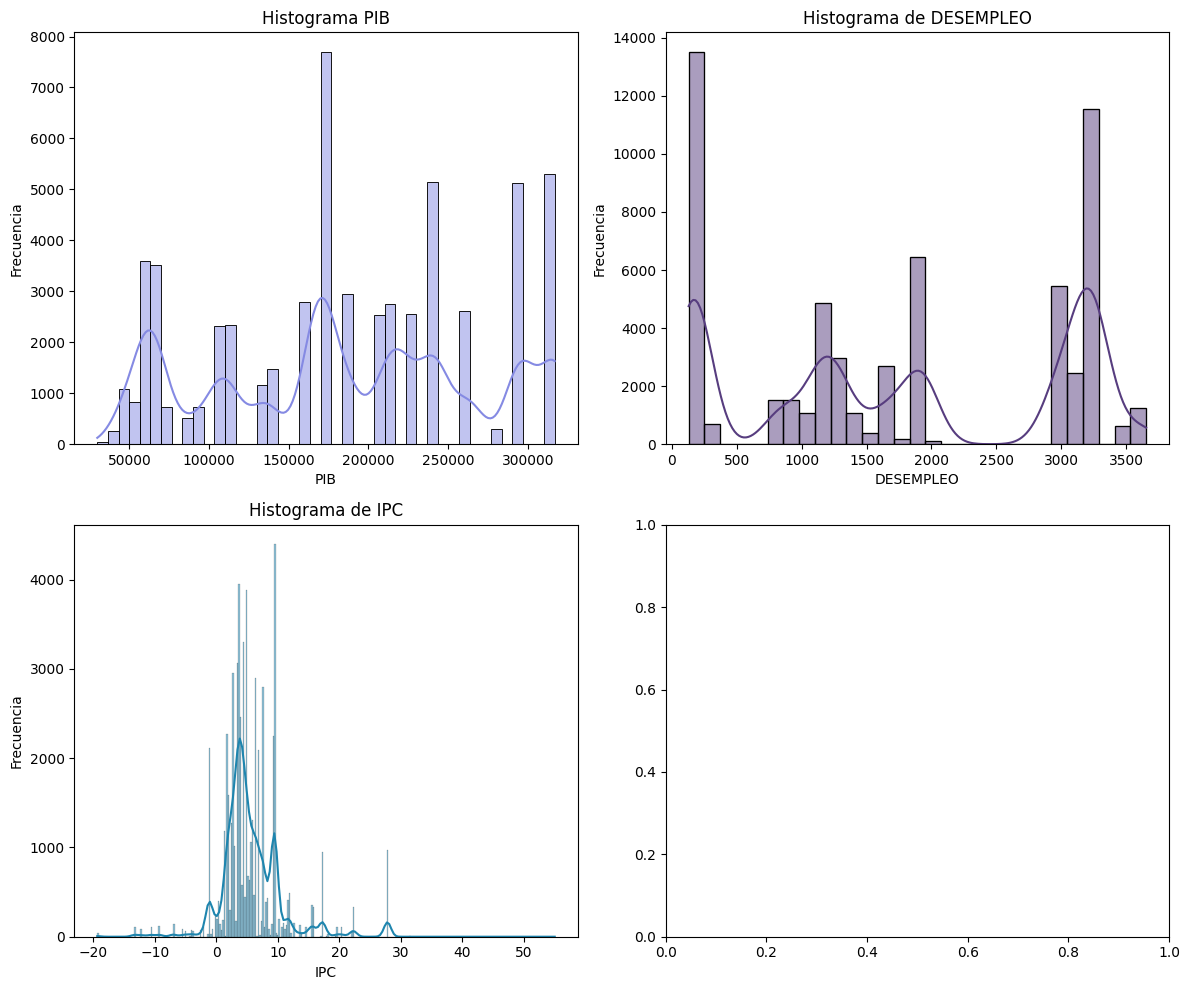

In [ ]:
fig, axs = plt.subplots(2, 2, figsize=(12, 10)) 

sns.histplot(data['PIB'], kde=True, color='#858ae3', ax=axs[0, 0])
axs[0, 0].set_title('Histograma PIB')
axs[0, 0].set_ylabel('Frecuencia')

sns.histplot(data['DESEMPLEO'], kde=True, color='#573d7f', ax=axs[0, 1])
axs[0, 1].set_title('Histograma de DESEMPLEO')
axs[0, 1].set_ylabel('Frecuencia')

sns.histplot(data['IPC'], kde=True, color='#1e85ae', ax=axs[1, 0])
axs[1, 0].set_title('Histograma de IPC')
axs[1, 0].set_ylabel('Frecuencia')

plt.tight_layout()

Distribución de las variables macroeconómicas por año

In [24]:
# Crear el gráfico de cajas y bigotes para PIB por año
fig = px.box(data, x='Año', y='PIB', 
             title='Diagrama de Cajas y Bigotes de PIB por Año',
             labels={'Año': 'Año', 'PIB': 'PIB'})

# Mostrar el gráfico interactivo
fig.show()

Índices de Precios del Consumidor

- En años como 2020 y 2018, los violines son bastante simétricos, lo que indica que los valores están distribuidos de manera uniforme en torno a la mediana.

- En 2023 y 2017, sin embargo, los violines parecen estar sesgados, con algunos datos extremos. Esto sugiere la presencia de valores atípicos o que los datos tienen un sesgo hacia uno de los extremos (hacia valores más altos en 2023 y más bajos en 2017).

- Los valores más altos en 2023 y más bajos en 2017 podrían estar relacionados con eventos económicos específicos en esos años que impactaron el IPC.

In [25]:
# Crear el gráfico de violín horizontal para IPC por año
fig = px.violin(data, y='Año', x='IPC', 
                title='Diagrama de Violín de IPC por Año',
                orientation='h',  # Configurar orientación horizontal
                labels={'Año': 'Año', 'IPC': 'IPC'})

# Mostrar el gráfico interactivo
fig.show()

### Análisis de asimetría y curtosis

1. Platicúrtica (Colas delgadas, menos outliers): Curtosis < 3
2. Mesocúrtica (Distribución normal, colas moderadas: Curtosis igual o cercana a 3.
3. Leptocúrtica (Colas extremadamente pesadas, muchos outliers: Curtosis > 3

In [ ]:
from scipy.stats import skew, kurtosis

numericas = data.select_dtypes(include='number')

# Calcular la simetría (skewness) y curtosis para cada variable numérica
resultados = pd.DataFrame({
    'Simetría': numericas.apply(skew),
    'Curtosis': numericas.apply(kurtosis)
})

# Clasificar la curtosis en Platicúrtica, Mesocúrtica y Leptocúrtica
def clasificar_curtosis(kurtosis_value):
    if kurtosis_value < 3:
        return 'Platicúrtica (Colas delgadas)'
    elif kurtosis_value == 3:
        return 'Mesocúrtica (Distribución normal)'
    else:
        return 'Leptocúrtica (Colas pesadas)'

# Clasificar la simetría en derecha, izquierda o simétrica
def clasificar_simetria(skewness_value):
    if skewness_value > 0:
        return 'Simetría a la derecha'
    elif skewness_value < 0:
        return 'Simetría a la izquierda'
    else:
        return 'Simetría perfecta'

# Aplicar las clasificaciones de simetría y curtosis
resultados['Clasificación Curtosis'] = resultados['Curtosis'].apply(clasificar_curtosis)
resultados['Clasificación Simetría'] = resultados['Simetría'].apply(clasificar_simetria)

# Mostrar la tabla con los resultados
print(resultados)

                                                 Simetría      Curtosis  \
NIT                                             -0.219858     -1.659381   
IPC                                              1.400610      6.027205   
PIB                                             -0.059297     -1.084541   
DESEMPLEO                                        0.024010     -1.495466   
Flujo de Caja Operativo                        237.931374  57189.205207   
CAPEX                                           77.963165  10146.361320   
Flujo de Caja Libre (FLC)                        8.661120    965.239222   
Razón Corriente                                174.293478  32004.255931   
Rotación Inventario Producto Terminado (días)  241.605973  58372.627439   
Rotacion Cartera Dias                          201.790918  42910.746433   
KTNO                                          -208.983366  48046.220911   
ROA                                            -79.879196  14036.641657   
MargenAntesImpuestos     

### Variables microeconómicas

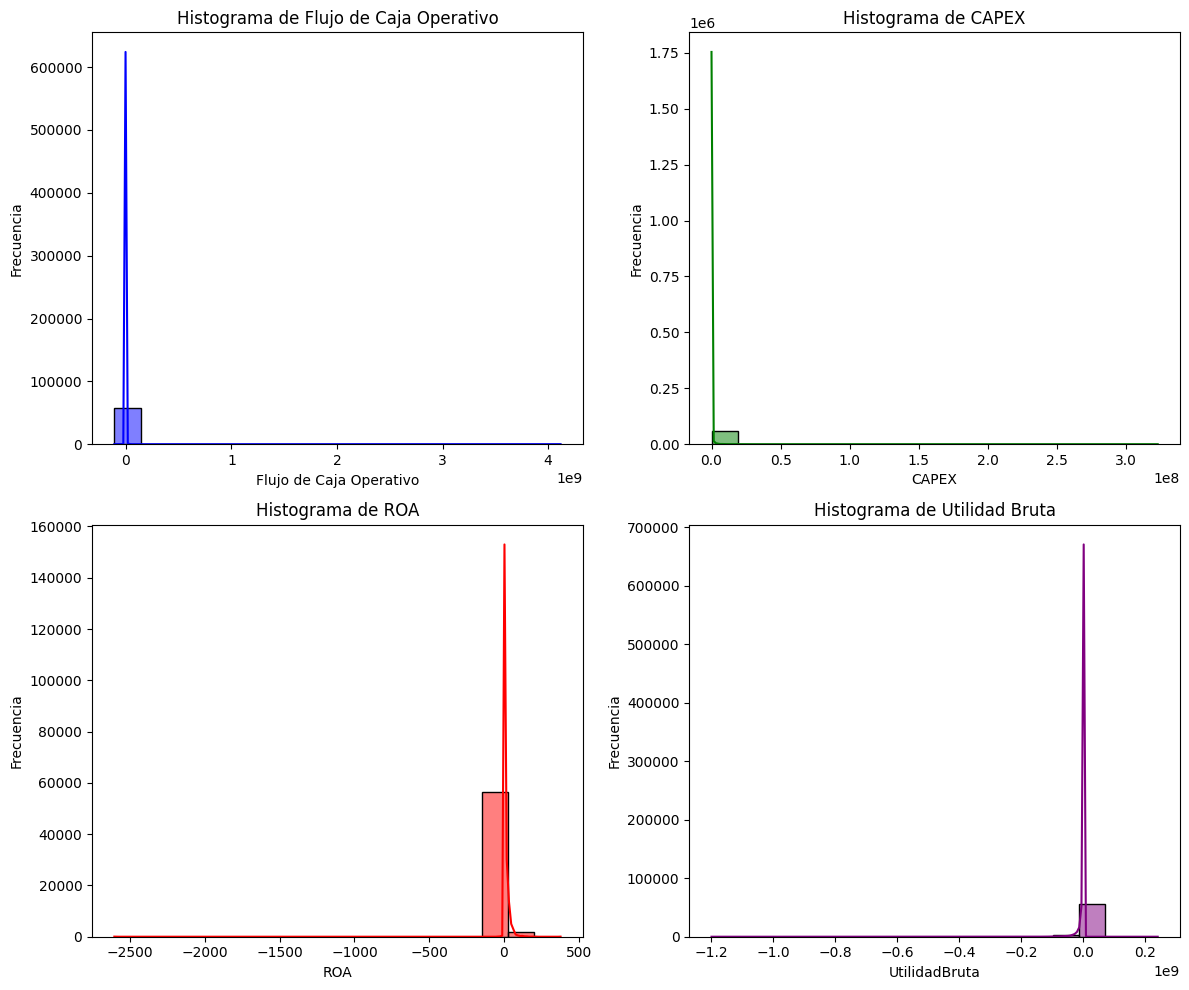

In [ ]:
fig, axs = plt.subplots(2, 2, figsize=(12, 10))  # 2 filas y 2 columnas

# Histograma 1
sns.histplot(data['Flujo de Caja Operativo'], kde=True, color='blue', ax=axs[0, 0])
axs[0, 0].set_title('Histograma de Flujo de Caja Operativo')
axs[0, 0].set_ylabel('Frecuencia')

# Histograma 2
sns.histplot(data['CAPEX'], kde=True, color='green', ax=axs[0, 1])
axs[0, 1].set_title('Histograma de CAPEX')
axs[0, 1].set_ylabel('Frecuencia')

# Histograma 3
sns.histplot(data['ROA'], kde=True, color='red', ax=axs[1, 0])
axs[1, 0].set_title('Histograma de ROA')
axs[1, 0].set_ylabel('Frecuencia')

# Histograma 4
sns.histplot(data['UtilidadBruta'], kde=True, color='purple', ax=axs[1, 1])
axs[1, 1].set_title('Histograma de Utilidad Bruta')
axs[1, 1].set_ylabel('Frecuencia')

# Ajustar el espaciado entre los gráficos
plt.tight_layout()

plt.show()



<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=2d476bef-207a-4bed-a270-37306c226df0' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>